# Problem Statement:
- Goal is to create a classification model which can predict all positive classes correctly.(Recall Should be high.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Client.csv', index_col=0)
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,34145,1,1.0,0.0,0.0,8.0,3.177


In [3]:
df.drop(columns=['CASENUM'], inplace=True)

In [4]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,NaN,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [5]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
#Check missing values

In [7]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
#Missing value imputation

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
si = SimpleImputer(strategy='most_frequent')

In [11]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [12]:
df.iloc[:,1:4]

,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [13]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [14]:
df.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [15]:
df['CLMAGE'].fillna(df['CLMAGE'].median(), inplace=True)

In [16]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [17]:
#Define x and y

In [18]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,30.0,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [19]:
x = df.iloc[:,1:]
y = df['ATTORNEY']
y

0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

# Model Building

In [20]:
#Split the data.

In [21]:
df.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
5,1,1.0,1.0,0.0,35.0,0.309
6,1,0.0,1.0,0.0,9.0,3.538
7,1,1.0,1.0,0.0,34.0,4.881
8,0,1.0,1.0,0.0,60.0,0.874
9,0,0.0,1.0,0.0,30.0,0.350


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1148,1.0,1.0,0.0,7.0,3.734
807,0.0,1.0,0.0,16.0,111.405
1287,0.0,0.0,0.0,10.0,0.040
590,1.0,1.0,0.0,6.0,0.100
1188,1.0,1.0,0.0,44.0,13.000
...,...,...,...,...,...
1095,0.0,1.0,0.0,47.0,0.080
1130,1.0,1.0,0.0,30.0,5.595
1294,1.0,1.0,0.0,30.0,1.041
860,1.0,0.0,0.0,55.0,1.769


In [25]:
ytrain

1148    0
807     1
1287    0
590     0
1188    1
       ..
1095    1
1130    1
1294    1
860     1
1126    0
Name: ATTORNEY, Length: 1072, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg = LogisticRegression()

In [28]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
xtrain.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1148,1.0,1.0,0.0,7.0,3.734
807,0.0,1.0,0.0,16.0,111.405
1287,0.0,0.0,0.0,10.0,0.040
590,1.0,1.0,0.0,6.0,0.100
1188,1.0,1.0,0.0,44.0,13.000


In [30]:
lg.coef_

array([[-0.36427295, -0.335242  ,  0.70473014, -0.00883013,  0.41189508]])

In [31]:
xtest.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671
367,0.0,1.0,0.0,34.0,0.567
259,0.0,1.0,1.0,66.0,4.530


In [32]:
(-0.36427295)*1.0+(-0.335242)*1.0+( 0.70473014)*0.0+(-0.00883013)*5.0+(0.41189508)*5.163

1.3829486980400003

In [33]:
1/(1+np.exp(-1.3829486980400003))

0.7994641565815835

In [34]:
(-0.36427295)*1.0+(-0.335242)*1.0+( 0.70473014)*0.0+(-0.00883013)*41.0+(0.41189508)*0.671

-0.7851686813200001

In [35]:
1/(1+np.exp(0.7851686813200001))

0.31320698744899744

In [36]:
xtest.head(3)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671


In [37]:
len(xtest)

268

In [39]:
ypred = lg.predict(xtest)

In [40]:
print(ytest[:25].values)
print(ypred[:25])

[1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]
[1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1]


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[113,  27],
       [ 43,  85]], dtype=int64)

<AxesSubplot:>

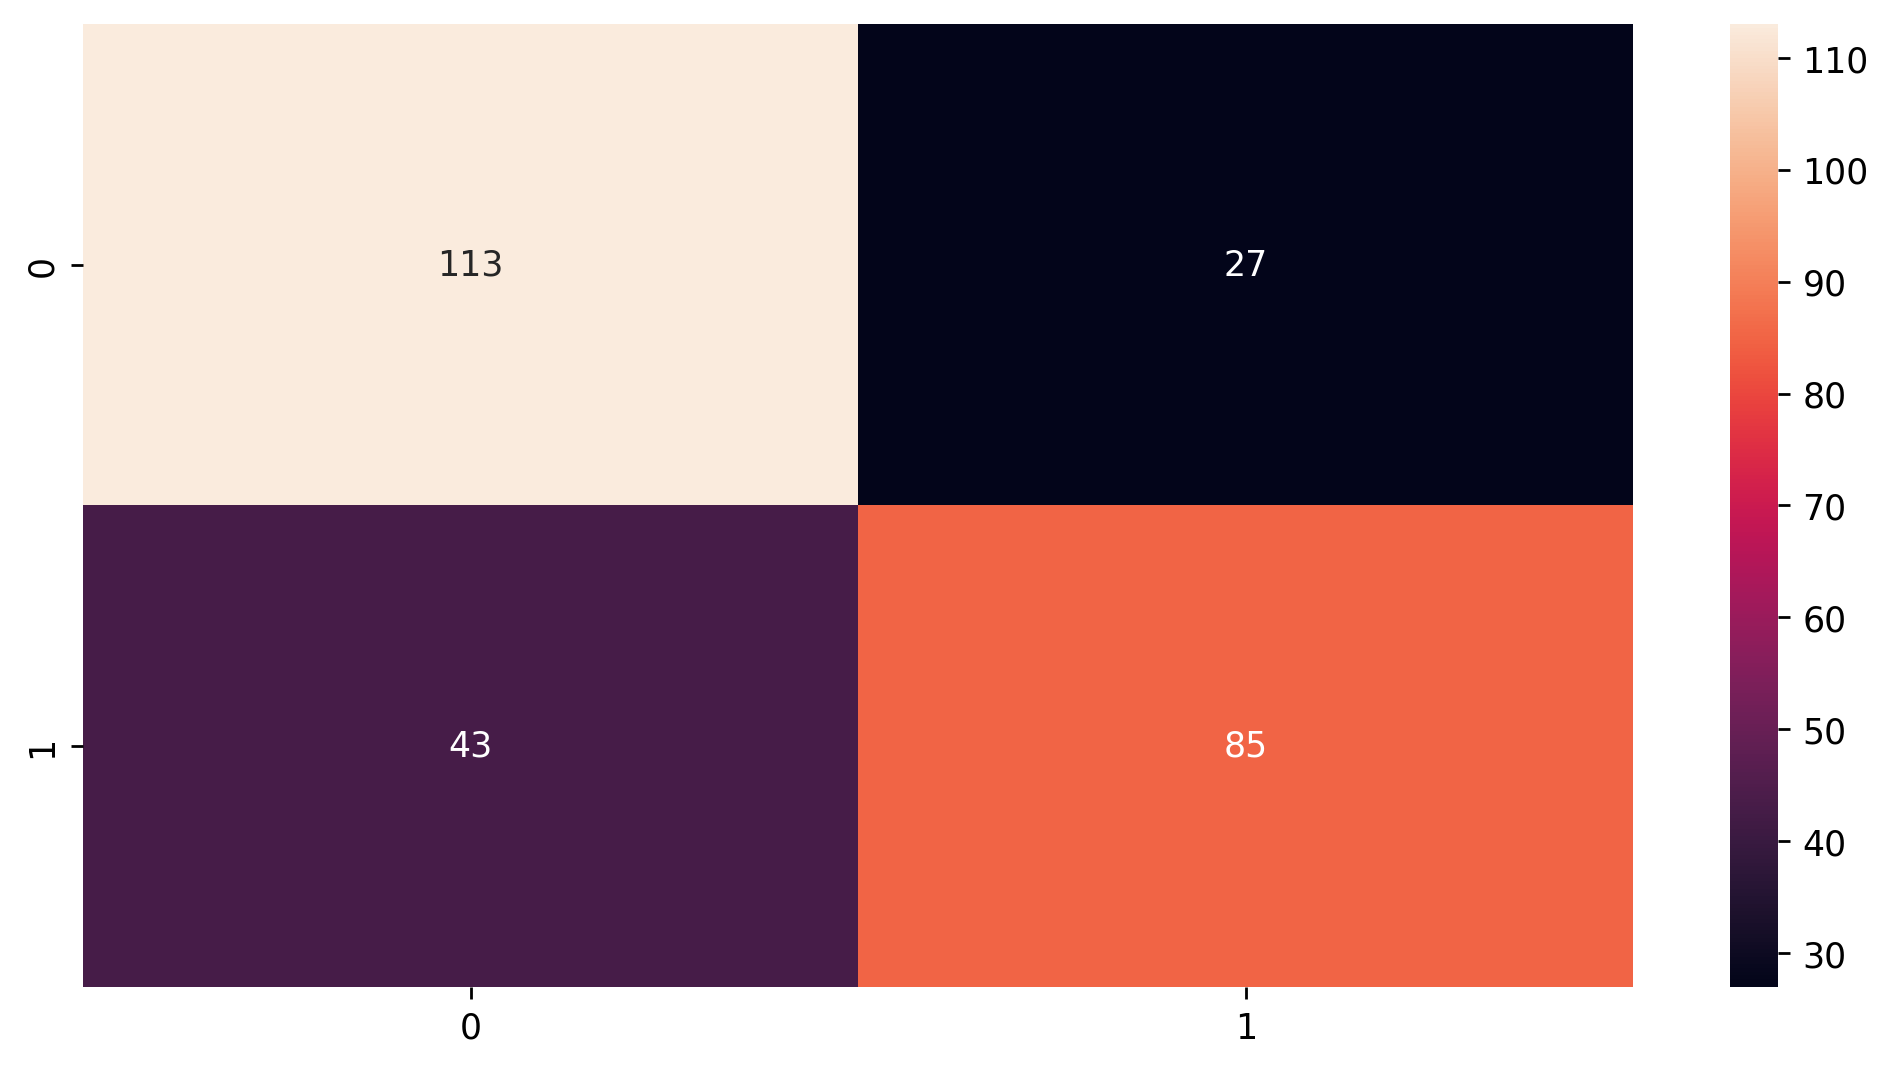

In [43]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True, fmt='g')

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       140
           1       0.76      0.66      0.71       128

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



# Threshold Selection

In [46]:
xtest.head(3)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671


In [48]:
ypred[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [50]:
proba = lg.predict_proba(xtest)[:,1]

In [51]:
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score

In [78]:
auc = roc_auc_score(ytest,proba)
auc

0.7648158482142858

In [54]:
fpr,tpr,threshold = roc_curve(ytest,proba)

In [55]:
fpr

array([0.        , 0.        , 0.00714286, 0.00714286, 0.01428571,
       0.01428571, 0.02857143, 0.02857143, 0.03571429, 0.03571429,
       0.05      , 0.05      , 0.05714286, 0.05714286, 0.06428571,
       0.06428571, 0.07142857, 0.07142857, 0.07857143, 0.07857143,
       0.08571429, 0.08571429, 0.09285714, 0.09285714, 0.1       ,
       0.1       , 0.11428571, 0.11428571, 0.12142857, 0.12142857,
       0.12857143, 0.12857143, 0.13571429, 0.13571429, 0.15      ,
       0.15      , 0.15714286, 0.15714286, 0.16428571, 0.16428571,
       0.17142857, 0.17142857, 0.18571429, 0.18571429, 0.19285714,
       0.19285714, 0.2       , 0.2       , 0.22142857, 0.22142857,
       0.22857143, 0.22857143, 0.23571429, 0.23571429, 0.25      ,
       0.25      , 0.26428571, 0.26428571, 0.28571429, 0.3       ,
       0.3       , 0.35      , 0.35      , 0.35714286, 0.35714286,
       0.37857143, 0.37857143, 0.42142857, 0.42142857, 0.43571429,
       0.43571429, 0.47142857, 0.47142857, 0.5       , 0.5    

In [56]:
tpr

array([0.       , 0.0234375, 0.0234375, 0.078125 , 0.078125 , 0.0859375,
       0.0859375, 0.1015625, 0.1015625, 0.109375 , 0.109375 , 0.140625 ,
       0.140625 , 0.2109375, 0.2109375, 0.21875  , 0.21875  , 0.234375 ,
       0.234375 , 0.2421875, 0.2421875, 0.265625 , 0.265625 , 0.3125   ,
       0.3125   , 0.3359375, 0.3359375, 0.3515625, 0.3515625, 0.421875 ,
       0.421875 , 0.4296875, 0.4296875, 0.46875  , 0.46875  , 0.53125  ,
       0.53125  , 0.5546875, 0.5546875, 0.5625   , 0.5625   , 0.5859375,
       0.5859375, 0.625    , 0.625    , 0.6796875, 0.6796875, 0.6953125,
       0.6953125, 0.703125 , 0.703125 , 0.734375 , 0.734375 , 0.75     ,
       0.75     , 0.7578125, 0.7578125, 0.765625 , 0.765625 , 0.765625 ,
       0.7734375, 0.7734375, 0.7890625, 0.7890625, 0.796875 , 0.796875 ,
       0.8125   , 0.8125   , 0.8203125, 0.8203125, 0.828125 , 0.828125 ,
       0.84375  , 0.84375  , 0.8515625, 0.8515625, 0.859375 , 0.859375 ,
       0.8671875, 0.8671875, 0.8671875, 0.8671875, 

In [57]:
threshold

array([2.        , 1.        , 1.        , 0.99559029, 0.98435566,
       0.98109511, 0.95343001, 0.93382055, 0.92746387, 0.92060623,
       0.90384582, 0.8668176 , 0.85310899, 0.81599758, 0.80316271,
       0.80178382, 0.80171381, 0.79761455, 0.79187796, 0.78821071,
       0.78746673, 0.76216798, 0.76086392, 0.73305518, 0.72914171,
       0.71234596, 0.70245786, 0.69532357, 0.69429674, 0.67126479,
       0.66517171, 0.65338508, 0.65065165, 0.64092364, 0.63646197,
       0.6088348 , 0.60170102, 0.58450621, 0.58442411, 0.57609825,
       0.56942904, 0.55869187, 0.55296542, 0.53729489, 0.53072905,
       0.49739259, 0.48871241, 0.46889672, 0.46372046, 0.45463549,
       0.45064387, 0.44292098, 0.4414904 , 0.43639883, 0.43568429,
       0.43562243, 0.42673106, 0.42097172, 0.41417889, 0.41151982,
       0.41145827, 0.39890109, 0.39622523, 0.39609682, 0.39559741,
       0.39355557, 0.38969119, 0.38573817, 0.38445128, 0.38243007,
       0.37961974, 0.36694333, 0.36624337, 0.35959519, 0.35938

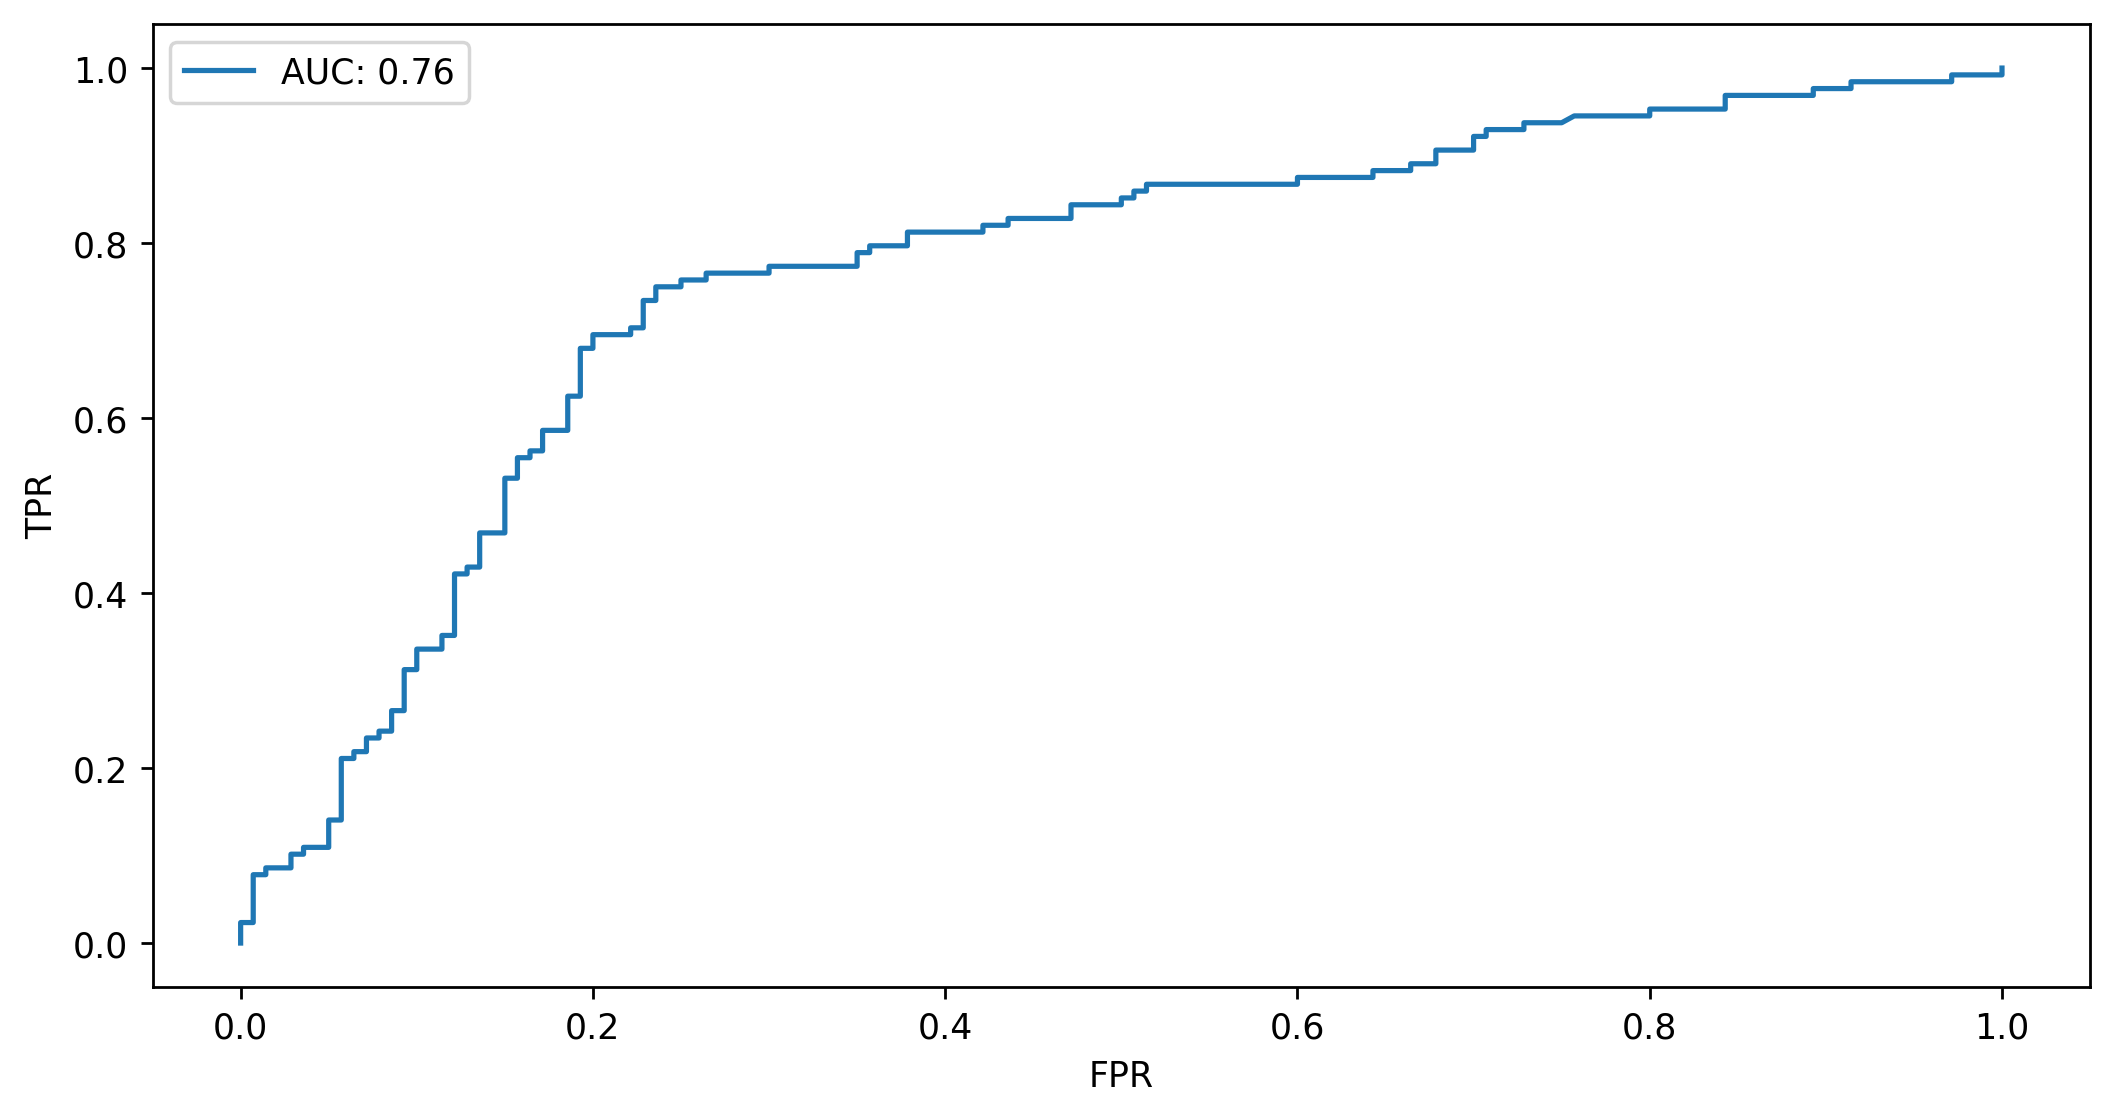

In [77]:
plt.plot(fpr,tpr, label = 'AUC: %0.2f'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [59]:
proba[:5]

array([0.78821071, 0.87659534, 0.2986062 , 0.38445128, 0.8297433 ])

In [60]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [61]:
accuracy

[0.5223880597014925,
 0.5223880597014925,
 0.5335820895522388,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5597014925373134,
 0.5634328358208955,
 0.5895522388059702,
 0.5932835820895522,
 0.5895522388059702,
 0.5932835820895522,
 0.5932835820895522,
 0.5970149253731343,
 0.5932835820895522,
 0.5970149253731343,
 0.6007462686567164,
 0.6044776119402985,
 0.6194029850746269,
 0.6231343283582089,
 0.6268656716417911,
 0.6268656716417911,
 0.6268656716417911,
 0.6305970149253731,
 0.6567164179104478,
 0.6604477611940298,
 0.6567164179104478,
 0.6604477611940298,
 0.6716417910447762,
 0.6716417910447762,
 0.6940298507462687,
 0.6977611940298507,
 0.7014925373134329,
 0.7052238805970149,
 0.7014925373134329,
 0.7052238805970149,
 0.7089552238805971,
 0.7089552238805971,
 0.7201492537313433,
 0.7238805970149254,
 0.7425373134328358,
 0.746268656716418,
 0.74626865671

In [62]:
threshold_selection = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' : accuracy
})

In [63]:
threshold_selection

,Threshold,Accuracy
0,2.000000,0.522388
1,1.000000,0.522388
2,1.000000,0.533582
3,0.995590,0.552239
4,0.984356,0.555970
...,...,...
105,0.266330,0.511194
106,0.240199,0.488806
107,0.239893,0.485075
108,0.207195,0.477612


In [64]:
threshold_selection.sort_values(by = 'Accuracy',ascending=False)

,Threshold,Accuracy
54,0.435684,0.753731
53,0.436399,0.753731
52,0.441490,0.753731
55,0.435622,0.750000
56,0.426731,0.750000
...,...,...
105,0.266330,0.511194
106,0.240199,0.488806
107,0.239893,0.485075
108,0.207195,0.477612


In [65]:
from sklearn.preprocessing import binarize

In [66]:
proba

array([0.78821071, 0.87659534, 0.2986062 , 0.38445128, 0.8297433 ,
       0.64092364, 0.39890109, 0.45463549, 0.44292098, 0.87909809,
       0.33962635, 0.31872302, 0.4097136 , 0.44537759, 0.32277285,
       0.73744764, 0.33360802, 0.27281284, 0.34512747, 0.91339469,
       1.        , 0.70245786, 0.75938053, 0.50377016, 0.80171381,
       0.33265341, 0.25357962, 0.30549397, 0.36060377, 0.31719918,
       1.        , 0.42673106, 0.24019873, 0.34948609, 0.34705529,
       0.28707649, 0.41151982, 0.68809903, 0.26934924, 0.62706648,
       0.4414904 , 0.36694333, 0.46889672, 0.36624337, 0.26647149,
       0.56246823, 0.38243007, 0.66517171, 0.64894073, 0.44119999,
       0.80178382, 0.39372775, 0.3015972 , 0.41417889, 0.20719538,
       1.        , 0.28340744, 0.29302456, 0.35271262, 0.3147238 ,
       0.99559029, 0.62348266, 0.29446574, 0.59144794, 0.56377085,
       0.30771536, 0.34000242, 0.84447142, 0.26647149, 0.31050882,
       0.43568429, 0.68593993, 0.32285261, 0.38573817, 0.30645

In [72]:
new_pred = binarize([proba],threshold=0.435684)[0]

In [73]:
new_pred

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [74]:
print(classification_report(ytest,new_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       140
           1       0.73      0.75      0.74       128

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268

